# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
tsp_df = pd.read_table('../coding_tsp/dataset/ha30_dist.txt', header=None, delim_whitespace=' ')

In [3]:
tsp_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,39,22,59,54,33,57,32,89,73,...,38,16,43,21,50,57,46,72,121,73
1,39,0,20,20,81,8,49,64,63,84,...,78,24,69,18,75,88,68,44,83,52
2,22,20,0,39,74,18,60,44,71,73,...,59,5,62,7,57,78,51,51,100,56
3,59,20,39,0,93,27,51,81,48,80,...,97,44,83,38,84,100,77,31,63,42
4,54,81,74,93,0,73,43,56,104,76,...,33,69,12,69,64,7,69,122,73,114
5,33,8,18,27,73,0,45,61,71,88,...,71,20,61,13,75,80,68,52,90,60
6,57,49,60,51,43,45,0,85,88,115,...,70,58,38,52,103,49,102,81,69,92
7,32,64,44,81,56,61,85,0,74,43,...,23,41,53,48,19,53,17,70,92,63
8,89,63,71,48,104,71,88,74,0,38,...,90,76,116,76,58,98,57,19,33,16
9,73,84,73,80,76,88,115,43,38,0,...,53,75,83,80,24,69,27,49,51,39


# Genetic Algorithm Modelling

**Crossover Scheme** <br>
***
source: https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35 <br>
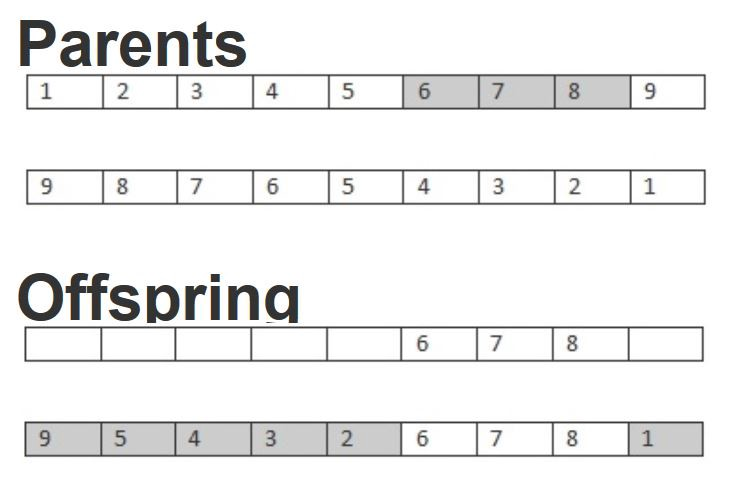

In [64]:
class GeneticAlgorithm:
    def __init__(self, dataframe=None, number_of_chromosomes=50, maximum_generations=200, crossover_rate=0.85, mutation_rate=0.01, break_optimal_solution=True, start_city=0):
        self.dataframe = dataframe
        self.number_of_chromosomes = number_of_chromosomes
        self.maximum_generations = maximum_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.break_optimal_solution = break_optimal_solution
        self.start_city = start_city
        self.best_fitness_values=0
        # define variable untuk store solutions
        self.populations = list()
        # hitung dimensi (banyak kota) dari dataframe yang dimasukkan
        self.number_of_cities = dataframe.shape[1]
        # buat list untuk menampung daftar city yang ada (dilihat dari atribut dataframe)
        self.cities = tsp_df.columns.tolist()
        
        # remove element start_city pada self.cities
        self.cities.remove(self.start_city)
    
    def initialize_populations(self):
        # Representasi Kromosom dalam bentuk permutational encoding sejumlah number_of_chromosomes
        for i in range(self.number_of_chromosomes):
            cities = self.cities.copy()
            
            # inisialisasi kromosom dengan gen ke-0 = gen ke-(number_of_cities)
            chromosome = list()
            
            # append start city ke chromosome[0]
            chromosome.append(self.start_city)
            for i in range(1, self.number_of_cities):
                # masukkan random kode kota lain selain start city untuk gen kromosom berikutnya
                random_index_city = cities[rd.randint(0, len(cities)-1)]
                while(random_index_city not in cities):
                    random_index_city = cities[rd.randint(0, len(cities)-1)]
                # append random_index_city ke chromosome
                chromosome.append(random_index_city)
                # hapus index cities karena sudah diambil (konsep permutasional encoding)
                cities.remove(random_index_city)
            # append start city ke chromosome[n]
            chromosome.append(self.start_city)
                
            # append chromosome ke dalam populations
            self.populations.append(list((np.array(chromosome), 0)))
        
        return self.populations
    
    def calculate_fitness(self, populations):
        df = self.dataframe.copy()
        for index_chromosome in range(len(populations)):
            fungsi_objektif_chromosome = 0 
            # hitung jarak sebagai fungsi objektif dari setiap kromosom
            index_gen = 0
            x = populations[index_chromosome][0]
            while(index_gen < len(x)-1):
                row_index = x[index_gen]
                col_index = x[index_gen+1]
                fungsi_objektif_chromosome += df.loc[row_index,col_index]
                index_gen+=1
            # hitung fungsi fitness F = 1/1+fungsi_objektif
            fitness_chromosome = 1 / (1 + fungsi_objektif_chromosome)
            populations[index_chromosome][1] = fitness_chromosome
        return populations
            
    def roulette_wheel_selection(self, populations):
        # buat variabel daftar kromosom hasil seleksi
        selected_chromosomes = list()
        
        # hitung total fitness
        total_fitness = 0
        for index_chromosome in range(self.number_of_chromosomes):
            total_fitness += populations[index_chromosome][1]
        
        # hitung probabilitas setiap kromosom (Fitness[i]/total_fitness)
        probabilitas_chromosomes = list()
        for index_chromosome in range(self.number_of_chromosomes):
            probabilitas_chromosomes[index_chromosome] = populations[index_chromosome][1] / total_fitness
        
        # hitung kumulatif probabilitas
        kumulatif_probabilitas_chromosomes = list()
        kumulatif_probabilitas_chromosomes[0] = probabilitas_chromosomes[index_chromosome]
        for index_chromosome in range(1,self.number_of_chromosomes):
            kumulatif_probabilitas[index_chromosome] += (probabilitas_chromosomes[index_chromosome-1] + probabilitas_chromosomes[index_chromosome])
        
        # cek kromosom mana saja yang akan diseleksi berdasarkan nilai acak dan kumulatif probabilitas
        for index_chromosome in range(self.number_of_chromosomes):
            random_number = rd.random()
            if kumulatif_probabilitas_chromosomes[index_chromosome] > random_number:
                selected_chromosomes.append(populations[index_chromosome])
       
    def ordered_crossover(self, populations):
        '''
        ORDERED CROSSOVER diterapkan sebagai modifikasi crossover untuk kasus TSP, dimana setiap gen tidak boleh memiliki
        nilai alel yang sama
        '''
        child_chromosomes = list()
        number_of_crossover = round(self.number_of_chromosomes * self.crossover_rate)
        
        # lakukan proses crossover sebanyak number_of_crossover
        for iterate_crossover in range(number_of_crossover):
            # ambil dua kromosom induk secara acak, sehingga setiap proses crossover menghasilkan 2 kromosom anak (offspring)
            index_kromosom_induk_1 = rd.randint(0, self.number_of_chromosomes-1)
            index_kromosom_induk_2 = rd.randint(0, self.number_of_chromosomes-1)
            
            # antisipasi jika kedua kromomosom induk adalah sama
            while(index_kromosom_induk_1==index_kromosom_induk_2):
                index_kromosom_induk_1 = rd.randint(0, self.number_of_chromosomes-1)
                index_kromosom_induk_2 = rd.randint(0, self.number_of_chromosomes-1)
            
            kromosom_induk_1 = populations[index_kromosom_induk_1][0]
            kromosom_induk_2 = populations[index_kromosom_induk_2][0]
            
            # proses kawin silang, pilih gen perpotongan secara acak
            random_point_gene = rd.randint(0, self.number_of_cities-1)
            
            # siapkan variabel untuk menampung kromosom anak hasil persilangan kromosom induk
            kromosom_anak_1 = list(kromosom_induk_1[0:random_point_gene+1])
            kromosom_anak_2 = list(kromosom_induk_2[0:random_point_gene+1])
            
            # append gen dari kromosom induk 2 ke kromosom anak 1 yang gen gen nya tidak ada di kromosom anak 1
            for i in range(len(kromosom_induk_2)-1):
                if kromosom_induk_2[i] not in kromosom_anak_1:
                    kromosom_anak_1.append(kromosom_induk_2[i])
            # append kota terakhir sama dengan kota pertama (TSP)
            kromosom_anak_1.append(kromosom_anak_1[0])
            
            # append gen dari kromosom induk 1 ke kromosom anak 2 yang gen gen nya tidak ada di kromosom anak 2
            for i in range(len(kromosom_induk_1)-1):
                if kromosom_induk_1[i] not in kromosom_anak_2:
                    kromosom_anak_2.append(kromosom_induk_1[i])
            # append kota terakhir sama dengan kota pertama (TSP)
            kromosom_anak_2.append(kromosom_anak_2[0])
            
            # append 2 kromosom anak yang dihasilkan ke dalam child_chromosomes
            child_chromosomes.append(list((np.array(kromosom_anak_1), 0)))
            child_chromosomes.append(list((np.array(kromosom_anak_2), 0)))
            
        # hitung fitness value dari child chromsoome sebelum diappend ke populations
        child_chromosomes = self.calculate_fitness(child_chromosomes)
        
        # append semua child ke chromosomes
        for child in child_chromosomes:
            populations.append(child)
        return populations

    def swap_mutation(self, populations):
        # hitung berapa banyak gen yang akan dikenai operator mutasi
        number_of_gene_mutated = round(self.number_of_chromosomes * self.mutation_rate)
        
        # swap gen-x dengan gen-y pada kromosom yang sama sebanyak number_of_gene_mutated
        for index_chromosome, chromosome in enumerate(populations):
            kromosom = chromosome[0]
            for i in range(number_of_gene_mutated):
                random_index_gen_swapped = rd.randint(1, len(kromosom)-2)
                random_index_gen_swap_with = rd.randint(1, len(kromosom)-2)
                while(random_index_gen_swapped == random_index_gen_swap_with):
                    random_index_gen_swapped = rd.randint(1, len(kromosom)-2)
                    random_index_gen_swap_with = rd.randint(1, len(kromosom)-2)
                
                # swap gen pada random_index_gen_swapped dengan gen pada random_index_gen_swap_with
                temp = kromosom[random_index_gen_swapped] 
                kromosom[random_index_gen_swapped] = kromosom[random_index_gen_swap_with]
                kromosom[random_index_gen_swap_with] = temp
            
            populations[index_chromosome][0] = kromosom
            
        # calculate fitness value from mutated chromosome
        populations = self.calculate_fitness(populations)
        
        return populations
    
    def populations_selection(self, populations):
        """
        SELECTION POPULATION dilakukan dengan cara sorting kromosom berdasarkan nilai fitness tertinggi, pertahankan sejumlah
        number of chromsome
        """
        populations.sort(key = lambda x: x[1], reverse=True)
        return populations[0:self.number_of_chromosomes]
    
    def print_optimal_route(self):
        best_solution = self.populations[0][0]
        best_fitness = self.populations[0][1]
        print('='*40)
        print("OPTIMAL TRAVELLING SALESMAN ROUTE")
        print('='*40)
        for i in range(len(best_solution)):
            print("Kota {} ".format(best_solution[i]), end=' ')
            if i < len(best_solution)-1:
                print(" --> ", end='')
        print()
        print('='*40)
        print("OPTIMAL FITNESS")
        print('='*40)
        print('Best Fitness: ', best_fitness)
    
    def plot_best_fitness_values(self, marker='*', color='b'):
        plt.figure(figsize=(12, 8))
        plt.plot(np.array(ga.best_fitness_values), marker=marker, color=color)
        plt.title('OPTIMAL FITNESS VALUE IN EACH GENERATIONS')
        plt.xlabel('Number of Generations')
        plt.ylabel('Best Fitness Value')
        plt.xticks(ticks=range(0,len(self.best_fitness_values)), labels=[i+1 for i in range(0,len(self.best_fitness_values))])
        plt.show()
        
    
    def train(self):
        # create variable for number of convergence (stopping criteria)
        number_of_convergence = 0
        
        # create variable for storing best fitness value in each iteration
        best_fitness_values = list()
        
        # 1. create initial populations
        populations = self.initialize_populations()
                
        for i in range(self.maximum_generations):
            
            # 2. calculate fitness function from each chromosome in populations
            populations = self.calculate_fitness(populations)
            best_fitness = populations[0][1]
            best_fitness_values.append(best_fitness)

            # 3. crossover
            populations_after_crossover = self.ordered_crossover(populations)
            
            # 4. mutation
            populations_after_mutation = self.swap_mutation(populations_after_crossover)
    
            # 5. selection
            new_populations = self.populations_selection(populations_after_mutation)
            
            print("ITERASI KE-{} | BEST FITNESS = {}".format(i, best_fitness))
            
            if math.isclose(best_fitness, new_populations[0][1], rel_tol=1e-25):
                number_of_convergence+=1
            else:
                number_of_convergence=0
                populations = new_populations.copy()
            
            if number_of_convergence==10:
                break;
                
        self.populations = populations
        self.best_fitness_values = best_fitness_values
        return populations
    
    def get_cities_index(self):
        return ['Kota ke-'+str(i) for i in range(self.number_of_cities)]
    
    def get_data(self):
        return self.dataframe
    

In [65]:
ga = GeneticAlgorithm(dataframe=tsp_df, start_city=2, maximum_generations=100)

In [66]:
populations = ga.train()

ITERASI KE-0 | BEST FITNESS = 0.0006600660066006601
ITERASI KE-1 | BEST FITNESS = 0.0007627765064836003
ITERASI KE-2 | BEST FITNESS = 0.0007739938080495357
ITERASI KE-3 | BEST FITNESS = 0.0007905138339920949
ITERASI KE-4 | BEST FITNESS = 0.0008424599831508003
ITERASI KE-5 | BEST FITNESS = 0.0008525149190110827
ITERASI KE-6 | BEST FITNESS = 0.0008976660682226212
ITERASI KE-7 | BEST FITNESS = 0.0009066183136899365
ITERASI KE-8 | BEST FITNESS = 0.0009389671361502347
ITERASI KE-9 | BEST FITNESS = 0.001037344398340249
ITERASI KE-10 | BEST FITNESS = 0.001037344398340249
ITERASI KE-11 | BEST FITNESS = 0.001037344398340249
ITERASI KE-12 | BEST FITNESS = 0.0010438413361169101
ITERASI KE-13 | BEST FITNESS = 0.0010604453870625664
ITERASI KE-14 | BEST FITNESS = 0.0010604453870625664
ITERASI KE-15 | BEST FITNESS = 0.001076426264800861
ITERASI KE-16 | BEST FITNESS = 0.001081081081081081
ITERASI KE-17 | BEST FITNESS = 0.0010834236186348862
ITERASI KE-18 | BEST FITNESS = 0.0010834236186348862
ITERASI 

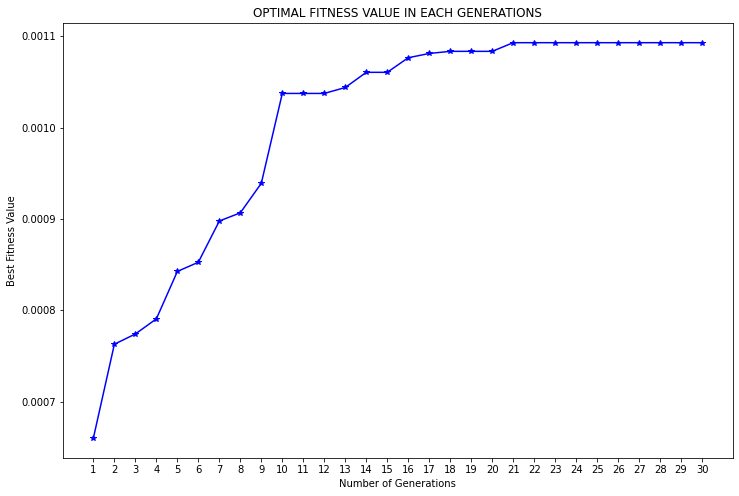

In [67]:
ga.plot_best_fitness_values()

In [20]:
# print optimal TSP ROUTE
ga.print_optimal_route()

OPTIMAL TRAVELLING SALESMAN ROUTE
Kota 2   --> Kota 10   --> Kota 17   --> Kota 11   --> Kota 5   --> Kota 3   --> Kota 1   --> Kota 23   --> Kota 21   --> Kota 7   --> Kota 26   --> Kota 16   --> Kota 19   --> Kota 9   --> Kota 13   --> Kota 29   --> Kota 14   --> Kota 6   --> Kota 22   --> Kota 4   --> Kota 24   --> Kota 18   --> Kota 8   --> Kota 27   --> Kota 28   --> Kota 25   --> Kota 15   --> Kota 20   --> Kota 0   --> Kota 12   --> Kota 2  
OPTIMAL FITNESS
Best Fitness:  0.00101010101010101
